# 発表資料などの資料作成に必要な素材を生成するためのノート


In [ ]:
# summarized_ = return_summarized_Fixed_dataframe()
# print(summarized_)
# indices = summarized_.index.values
# columns = summarized_.columns.values
# print(indices)
# print(columns)

# plt.figure()
# for row in indices:
#     print(summarized_.loc[row].to_numpy())
#     plt.plot(columns, summarized_.loc[row].to_numpy())

# return_summarized_Fixed_dataframe(BenchMark_name="cg").to_csv("./tmp_GenerateResources/SummarizedFixedDataframe_cg.csv")

# path = "./tmp_GenerateResources/"

# def generateScoreTable(benchmark_name="cg"):
#     list_ScoreTable = []
#     dict_summary_fixed_class = return_dict_summary_fixed(benchmark_name=benchmark_name, fixed="class")
#     raw_x = dict_summary_fixed_class["processes"]
# #     print(f"raw_x : {raw_x}, benchmark : {benchmark_name}")
#     for content in dict_summary_fixed_class:
#         if(content == "processes"):
#             continue
#         raw_y = dict_summary_fixed_class[content]
#         if(does_include_nan(raw_y)):
#             continue
# #         print(f"raw_y(={content}) : {raw_y}")
#         # 線形モデル
#         model_lin = ModelLin(raw_x, raw_y, benchmark_name, content)
#         model_lin.calc_lr()
#         model_lin.calc_r2_score()
#         model_lin.calc_mae_score()
#         model_lin.calc_mse_score()
#         model_lin.calc_rmse_score()
#         model_lin.calc_mape_score()
#         model_lin.plot_graph()
#         plt.title(f"ベンチマーク名：{model_lin.benchmark_name}, 関数名：{model_lin.function_name}, MAPE : {model_lin.mape_score}", y=-0.2)
#         plt.show()
#         # logモデル
#         model_log10 = ModelLog10(raw_x, raw_y, benchmark_name, content)
#         model_log10.calc_lr()
#         model_log10.calc_r2_score()
#         model_log10.calc_mae_score()
#         model_log10.calc_mse_score()
#         model_log10.calc_rmse_score()
#         model_log10.calc_mape_score()
#         model_log10.plot_graph()
#         if(model_log10.benchmark_name == "cg" and model_log10.function_name == "MPI_Irecv()"):
#             plt.savefig(path+model_log10.benchmark_name+'_'+model_log10.function_name+'.pdf')
#         if(model_log10.benchmark_name == "cg" and model_log10.function_name == "ICNVRT"):
#             plt.savefig(path+model_log10.benchmark_name+'_'+model_log10.function_name+'.pdf')
#         plt.title(f"ベンチマーク名：{model_log10.benchmark_name}, 関数名：{model_log10.function_name}, MAPE : {model_log10.mape_score}", y=-0.2)
#         plt.show()
#         # 反比例モデル
#         model_ip = ModelIP(raw_x, raw_y, benchmark_name, content)
#         model_ip.calc_lr()
#         model_ip.calc_r2_score()
#         model_ip.calc_mae_score()
#         model_ip.calc_mse_score()
#         model_ip.calc_rmse_score()
#         model_ip.calc_mape_score()
#         model_ip.plot_graph()
#         if(model_log10.benchmark_name == "lu" and model_log10.function_name == "EXACT"):
#             plt.savefig(path+model_log10.benchmark_name+'_'+model_log10.function_name+'.pdf')
#         plt.title(f"ベンチマーク名：{model_ip.benchmark_name}, 関数名：{model_ip.function_name}, MAPE : {model_ip.mape_score}", y=-0.2)
#         plt.show()
#         list_ScoreTable.append([content, model_lin.mape_score, model_log10.mape_score, model_ip.mape_score])
#     df_ScoreTable = pd.DataFrame(list_ScoreTable)
#     df_ScoreTable.columns = ["", "x mape", "logx mape", "1/x mape"]
#     df_ScoreTable.set_index("",inplace=True)
#     df_ScoreTable

# for benchmark in benchmarks:
#     generateScoreTable(benchmark)

# # 資料作成に使用する最もフィットするモデルはどれかを示すための表・グラフを作るためのプログラム


# def return_list_of_ratio_row(input_list):
#     sum_of_input_list = 0
#     return_list = []
#     for list_child in input_list:
#         sum_of_input_list += len(list_child)
#     for list_child in input_list:
#         num = int(len(list_child)/sum_of_input_list*10000)/100
#         return_list.append(num)
#     # 総和を100にする処理
#     # 最大になることの多い線形モデルはほかのモデルの割合の総和を100から引いたものにしている
#     i_0 = 100
#     for i in range(1, len(input_list)):
#         i_0 -= return_list[i]
#     return_list[0] = i_0
#     return(return_list)

# def return_list_of_range_row(input_list):
#     return_list = []
#     for list_child in input_list:
#         if(len(list_child) == 0):
#             data_str = "(NoData)"
#         else:
#             min_data = int(min(list_child)*100)/100
#             max_data = int(max(list_child)*100)/100
#             data_str = f"({min_data}-{max_data})"
#         return_list.append(data_str)
#     return(return_list)


# def return_row_list(input_list):
#     return_list = []
#     # 割合の入ったリストと最小・最大値の入ったリスト
#     list_of_ratio_row = return_list_of_ratio_row(input_list)
#     list_of_range_row = return_list_of_range_row(input_list)
    
#     # 上の二つのリストの要素同士を結合させる
#     for i in range(len(list_of_ratio_row)):
#         return_list.append(f"{list_of_ratio_row[i]}%{list_of_range_row[i]}")
    
#     return return_list

# csv_directory_path = './tmp_GenerateResources/'

# result_of_all = [[], [], []]
# list_for_csv = []

# list_for_csv_ratio = []
# list_for_csv_range = []

# for benchmark in benchmarks:
#     result_of_benchmark = [[], [], []]
#     file_name = benchmark+'.csv'
#     file_path = csv_directory_path+file_name
#     # ファイルが存在しない場合は処理を飛ばす
#     if(os.path.isfile(csv_directory_path+file_name) == False):
#         continue
#     # 完全に値をとれたもののみで集計するようにしている
#     if(benchmark != "cg" and benchmark != "ep" and benchmark != "lu"):
#         continue
#     # 現在処理中のベンチマーク名を出力
#     print(benchmark)
#     df = pd.read_csv(file_path, index_col=0)
#     columns = df.columns.values
#     indices = df.index.values
#     for index in indices:
#         row = df.loc[index].tolist()
#         result_of_benchmark[row.index(min(row))].append(min(row))
#         result_of_all[row.index(min(row))].append(min(row))
#     list_for_csv.append([benchmark]+return_row_list(result_of_benchmark))
# list_for_csv.append(["all"]+return_row_list(result_of_all))

# print(list_for_csv)

# csv_head = ["", "線形モデル", "対数モデル", "反比例モデル"]
# df_for_csv = pd.DataFrame(list_for_csv)
# df_for_csv.columns = csv_head
# df_for_csv.set_index("")
# df_for_csv

# # ipynb形式のライブラリのインポート
# %run ./lib.ipynb

# for benchmark in benchmarks:
#     SummarizedDF= return_summarized_Fixed_dataframe(BenchMark_name =benchmark, fixed="class")
#     SummarizedDFIndex = SummarizedDF.index.tolist()
#     SummarizedDFColumns = SummarizedDF.columns.tolist()
#     x_list = SummarizedDFColumns
#     targetFunctions=["RHS", "CFFTZ", "ICNVRT", "BUBBLE"]
#     for FunctionNames in SummarizedDFIndex:
#         y_list = SummarizedDF.loc[FunctionNames].tolist()
#         if(FunctionNames in targetFunctions and (does_include_nan(y_list))==False):
#             print(f"{FunctionNames}@{benchmark}")
#             plt.figure()
#             plt.title(FunctionNames)
#             plt.plot(x_list,y_list)
#             plt.xlabel('プロセス数')
#             plt.ylabel('コール回数')
#             plt.show()
#             if(FunctionNames=="RHS"):
#                 modelLin = ModelLin(raw_x=x_list, raw_y=y_list, benchmark_name=benchmark, function_name=FunctionNames)
#                 modelLin.train_x = modelLin.raw_x
#                 modelLin.train_y = modelLin.raw_y
#                 modelLin.calc_lr()
#                 modelLin.plot_graph(save=True, fileName=f"./tmp_GenerateResources/{FunctionNames}@{benchmark}.pdf")
#             elif(FunctionNames=="BUBBLE"):
#                 modelLog10 = ModelLog10(raw_x=x_list, raw_y=y_list, benchmark_name=benchmark, function_name=FunctionNames)
#                 modelLog10.train_x = modelLog10.raw_x
#                 modelLog10.train_y = modelLog10.raw_y
#                 modelLog10.calc_lr()
#                 modelLog10.plot_graph(save=True, fileName=f"./tmp_GenerateResources/{FunctionNames}@{benchmark}.pdf")
#             elif(FunctionNames=="CFFTZ"):
#                 modelIP = ModelIP(raw_x=x_list, raw_y=y_list, benchmark_name=benchmark, function_name=FunctionNames)
#                 modelIP.train_x = modelIP.raw_x
#                 modelIP.train_y = modelIP.raw_y
#                 modelIP.calc_lr()
#                 modelIP.plot_graph(save=True, fileName=f"./tmp_GenerateResources/{FunctionNames}@{benchmark}.pdf")
#             elif(FunctionNames=="ICNVRT"):
#                 modelBranch = ModelBranch(raw_x=x_list, raw_y=y_list, benchmark_name=benchmark, function_name=FunctionNames)
#                 modelBranch.train_x = modelBranch.raw_x
#                 modelBranch.train_y = modelBranch.raw_y
#                 modelBranch.calc_lr()
#                 modelBranch.plot_graph(save=True, fileName=f"./tmp_GenerateResources/{FunctionNames}@{benchmark}.pdf")

↓プロセス数を固定したもの
↓ベンチマーククラスを固定したもの


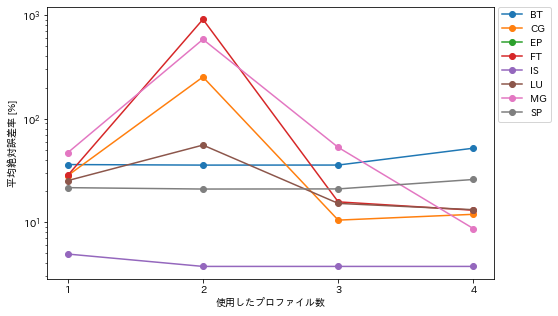

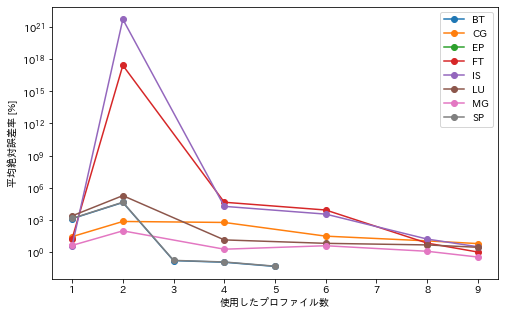

In [2]:
# ipynb形式のライブラリのインポート
%run ./lib.ipynb

# 論文で必要なグラフを生成する1
print("↓プロセス数を固定したもの")
GenGraphAveragePerProfileNum(benchmarks=benchmarks, Fixed="Process", Fix=64, Predict="D", EnableTitle=False, SaveGraph=True)
print("↓ベンチマーククラスを固定したもの")
GenGraphAveragePerProfileNum(benchmarks=benchmarks, Fixed="Class", Fix="B", Predict=256, EnableTitle=False, SaveGraph=True)

In [3]:
# # 論文で必要なグラフを生成する2
# for benchmark in benchmarks:
#     print(benchmark)
#     print("↓プロセス数を固定したもの")
#     GenGraphTotalTimePerProfileNum(benchmark=benchmark, Fixed="Process", Fix=64, Predict="D", EnableTitle=False, SaveGraph=True)
#     print("↓ベンチマーククラスを固定したもの")
#     GenGraphTotalTimePerProfileNum(benchmark=benchmark, Fixed="Class", Fix="B", Predict=256, EnableTitle=False, SaveGraph=True)
    

# # 論文で必要なグラフを生成する3
# benchmarks01 = ['cg', 'ep', 'mg']
# benchmarks02 = ['ft', 'lu']
# benchmarks03 = ["bt", "sp"]
# benchmarks04 = ['is']
# print(f"benchmarks01 = {benchmarks01}, benchmarks02 = {benchmarks02}, benchmarks03 = {benchmarks03}")
# print(f"↓ベンチマーククラスを固定したもの@{benchmarks01}")
# GenGraphAveragePerProfileNum(benchmarks=benchmarks01, Fixed="Class", Fix="B", Predict=256, EnableTitle=True)
# print(f"↓ベンチマーククラスを固定したもの@{benchmarks02}")
# GenGraphAveragePerProfileNum(benchmarks=benchmarks02, Fixed="Class", Fix="B", Predict=256, EnableTitle=True)
# print(f"↓ベンチマーククラスを固定したもの@{benchmarks03}")
# GenGraphAveragePerProfileNum(benchmarks=benchmarks03, Fixed="Class", Fix="B", Predict=256, EnableTitle=True)
# print(f"↓ベンチマーククラスを固定したもの@{benchmarks04}")
# GenGraphAveragePerProfileNum(benchmarks=benchmarks04, Fixed="Class", Fix="B", Predict=256, EnableTitle=True)

# # 論文で必要なグラフを生成する4
# print(f"↓ベンチマーククラスを固定したもの@{benchmarks04}")
# for benchmark in benchmarks:
#     GenGraphAveragePerProfileNum(benchmarks=[benchmark], Fixed="Class", Fix="B", Predict=256, EnableTitle=False, EnableScatter=True, SaveGraph=True)

In [4]:
# # benchmark = "cg"
# # benchmarks = [benchmark]
# Fix = "B"
# Predict = 256
# Fixed = "Class"

# def PlotRateOfCosts(benchmark = ["cg"], Fix="B", Predict=256, Fixed="Class"):
#     plt.figure()
#     for benchmark in benchmarks :
#         if(Fixed == "Process"):
#             DF = return_ErrorRateFixedProcess_AveragePredictCostRealCost(benchmark=benchmark, FixProcess=Fix, predict_class=Predict)
#         else:
#             DF = return_ErrorRateFixedClass_AveragePredictCostRealCost(benchmark=benchmark, FixClass=Fix, predict_process=Predict)
#         ConvertedDF = ConvertIndexNameToNumOfProfile(DF, Fixed=Fixed)
# #         print(DF)
#         x = ConvertedDF.index.tolist()
#         RealCost = DF["RealCost"].tolist()[0]
#         PredictCosts = DF["PredictCosts"].tolist()
#         y = []
#         for PredictCost in PredictCosts:
#             y.append(PredictCost/RealCost)
#         plt.plot(x, y)
        
#         plt.plot(x, [1]*len(x), label=benchmark)
#     plt.legend()
#     plt.xlabel("使用したプロファイル数")
#     plt.ylabel("予測にかかる総計算時間を実測にかかる総計算時間で割った値")
#     plt.show()
    
# PlotRateOfCosts(benchmark=benchmarks, Fix=64, Predict="D", Fixed="Process")

In [5]:
# # 論文で必要な表を生成する
# # FTの実行時間の表とFFTの実行回数の表

# # ipynb形式のライブラリのインポート
# %run ./lib.ipynb

# Classes = ["A", "B", "C", "D"]
# FunctionCalled = []
# columns = 0
# for Class in Classes:

#     Example = return_fixed_class(BenchMark="ft", FixedBenchMarkClass=Class)
#     DF = pd.concat(Example, axis=1)
#     columns = DF.columns.tolist()
#     sample = DF.T["FFT"]
#     FunctionCalled.append(sample)

# DF = pd.DataFrame(FunctionCalled)
# DF.index = Classes
# DF.to_latex("table_LatexForm/FunctionCalls.table")


# DF = pd.read_csv("csv_files/ExecTime@ft.csv", index_col=0)
# DF = DF[["1", "2", "4", "8", "16", "32", "64", "128", "256"]]
# DF = DF.T[["A", "D"]].T
# DF = DF[["8", "16", "32", "64", "128", "256"]]
# DF.to_latex("table_LatexForm/ExecTimes.table")

In [6]:
# 論文で必要な表を生成する
# 平均誤差率の表

# ipynb形式のライブラリのインポート
%run ./lib.ipynb


def returnDF_GenSummaryTable(benchmarks=["cg"], Fixed="Process", Fix=64, Predict="D"):
    ListBeforeDF = []
    for benchmark in benchmarks:
        if(Fixed=="Process"):
            FixedDF = return_ErrorRateFixedProcess_AveragePredictCostRealCost(benchmark=benchmark, FixProcess=Fix, predict_class=Predict)
            GraphTitle = f"ベンチマーク{benchmarks}で実行プロセス数を固定"
        else:
            FixedDF = return_ErrorRateFixedClass_AveragePredictCostRealCost(benchmark=benchmark, FixClass=Fix, predict_process=Predict)
            GraphTitle = f"ベンチマーク{benchmarks}でベンチマーククラスを固定"
        index = FixedDF.index.tolist()
        FixedDF = FixedDF.T[[index[1]]].T
        FixedDF.index = [benchmark.upper()]
        ListBeforeDF.append(FixedDF)
    returnDF = pd.concat(ListBeforeDF)
    return(returnDF)
    
def add_Average(DF):
    mean = DF.mean()
    mean.name = "平均"
    DF = DF.append(mean)
    return(DF)

def add_CompressionRate(DF):
    DF["コスト削減率"] = DF["予測計算時間"]/DF["実測計算時間"]*100
    print(DF)
    DF = DF[["平均誤差率", "コスト削減率"]]
    return(DF)
    
columns = ["平均誤差率", "予測計算時間", "実測計算時間"]
FixedProcessDF = returnDF_GenSummaryTable(benchmarks=benchmarks, Fixed="Process", Fix=64, Predict="D")
FixedProcessDF.columns = columns
FixedProcessDF = add_CompressionRate(FixedProcessDF)
FixedProcessDF = add_Average(FixedProcessDF)
FixedProcessDF.to_latex("table_LatexForm/FixProcessAverageAndCosts.table")
# print(FixedProcessDF)
FixedClassDF = returnDF_GenSummaryTable(benchmarks=benchmarks, Fixed="Class", Fix="B", Predict=256)
FixedClassDF.columns = columns
FixedClassDF = add_CompressionRate(FixedClassDF)
FixedClassDF = add_Average(FixedClassDF)
FixedClassDF.to_latex("table_LatexForm/FixClassAverageAndCosts.table")
# print(FixedClassDF)

      平均誤差率   予測計算時間   実測計算時間   コスト削減率
BT  35.6674  1852.16  29752.3  6.22526
CG  10.4759   513.92  14012.8   3.6675
EP        0   507.52  6827.52  7.43345
FT  15.7267   541.44  10331.5  5.24066
IS  3.74143    37.12   615.04  6.03538
LU  15.1996  1416.32  17210.2  8.22952
MG   52.837   128.64  2328.32  5.52501
SP  20.9777   1737.6  40019.8  4.34185
       平均誤差率   予測計算時間  実測計算時間   コスト削減率
BT  0.102775  1188.04     448  265.188
CG   10.2528   747.42   166.4  449.171
EP         0   428.42      64  669.406
FT   6.30354   620.08   115.2  538.264
IS   15.0837    43.47    7.68  566.016
LU   4.27287  1631.07  417.28  390.881
MG   1.08558    80.92   17.92  451.563
SP  0.108184    962.8  412.16  233.599


In [7]:
# ##### mgの挙動を確認するためのセル

# # ipynb形式のライブラリのインポート
# %run ./lib.ipynb

# benchmark = "mg"
# FixClass = "D"
# predict_process = 256
# DF = return_ErrorRateFixedClassDF(benchmark=benchmark, FixClass=FixClass, predict_process=predict_process)
# DF
# for benchmark in benchmarks:
#     lists = return_fixed_class(BenchMark=benchmark, Processes=[1, 2, 4, 8, 16, 32, 64, 128, 256], FixedBenchMarkClass="B")
#     DF = pd.concat(lists, axis=1)
#     index = DF.index.tolist()
#     columns = DF.columns.tolist()
#     plt.figure()
#     plt.yscale('log')
#     for i in index:
#         data = DF.loc[i].tolist()
#         if(does_include_nan(data)):
#             pass
#         else:
#             plt.plot(columns, data)
#     plt.show()

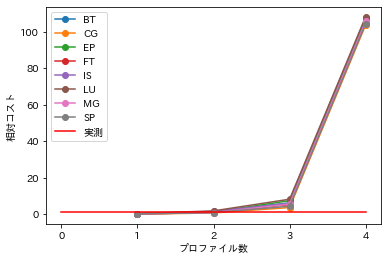

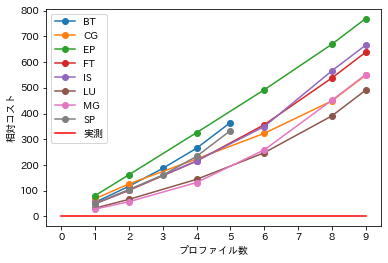

In [8]:
# 研究会で必要なグラフを生成する

# ipynb形式のライブラリのインポート
%run ./lib.ipynb

markers = [".", ",", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s", "p", "*", "h", "H", "+", "x", "D", "d"]

def genGraphTimeRateProfiles(Fixed = "Process", Fix = 64, Predict = "D"):

    plt.figure()
    for benchmark in benchmarks:

        if(Fixed=="Process"):
            FixedDF = return_ErrorRateFixedProcess_AveragePredictCostRealCost(benchmark=benchmark, FixProcess=Fix, predict_class=Predict)
        else:
            FixedDF = return_ErrorRateFixedClass_AveragePredictCostRealCost(benchmark=benchmark, FixClass=Fix, predict_process=Predict)
        ConvertedIndexFixedDF = ConvertIndexNameToNumOfProfile(inputDF=FixedDF, Fixed=Fixed)
        x = ConvertedIndexFixedDF.index.tolist()
        y = ConvertedIndexFixedDF["PredictCosts"]
        RealCost = ConvertedIndexFixedDF["RealCost"]
        y_rate = y/RealCost * 100
        plt.plot(x,y_rate,marker="o", label=benchmark.upper())

    if(Fixed=="Process"):
        plt.plot([0,4],[1,1], color="r", label="実測")
        FileName = "FixProcessAllTime.pdf"
    else:
        plt.plot([0,9],[1,1], color="r", label="実測")
        FileName = "FixClassAllTime.pdf"
        
    plt.legend()
    plt.xlabel("プロファイル数")
    plt.ylabel("相対コスト")
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.savefig(f"./tmp_GenerateResources/{FileName}")

genGraphTimeRateProfiles(Fixed = "Process", Fix = 64, Predict = "D")
genGraphTimeRateProfiles(Fixed = "Class",Fix = "B",Predict = 256)
